### 1、Lossy

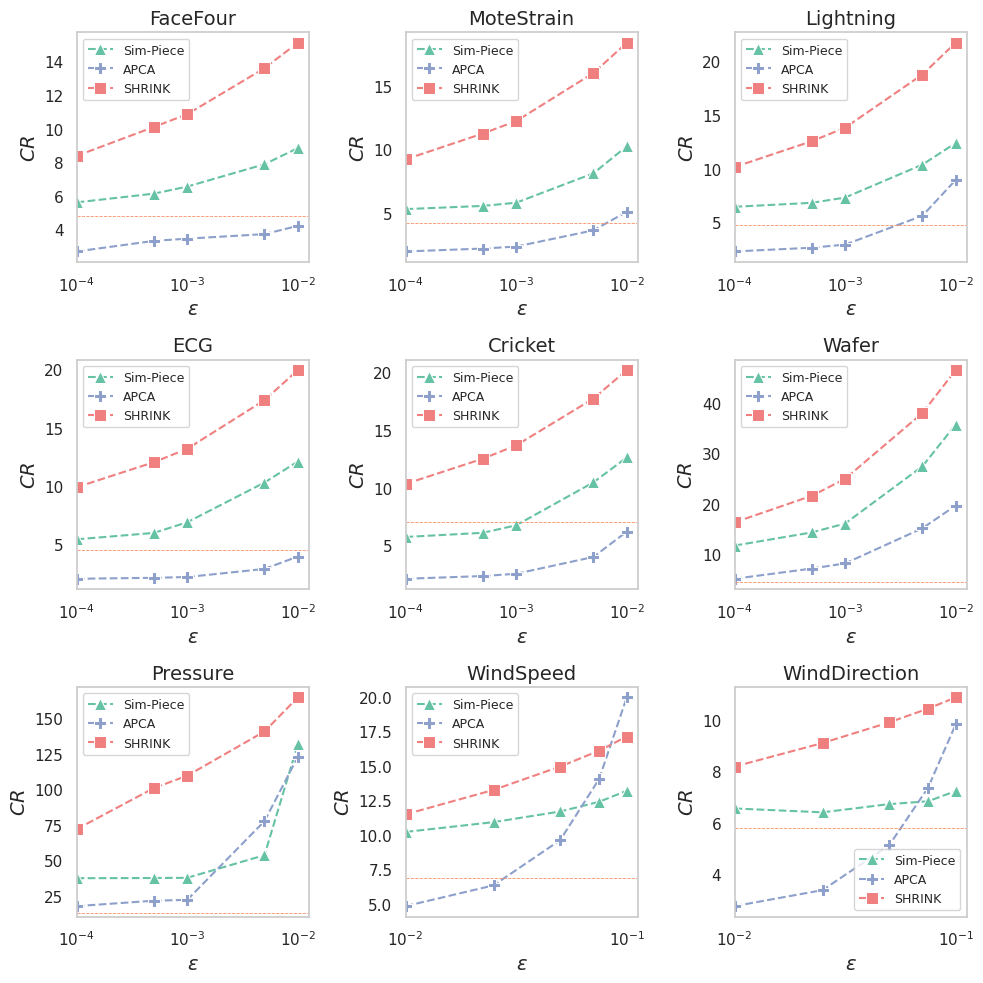

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import LogLocator


# Epsilon values and datasets
epsilon_values_default = [0.01, 0.005, 0.001, 0.0005, 0.0001]  # 默认Epsilon值
epsilon_values_special = [0.1, 0.075, 0.05, 0.025, 0.01] 

losslesscr = [ 4.8,        4.2,        4.7,        4.5,            7.0,      4.5,     13.1,   6.9,        5.8]

# datasets = ["FaceFour", "MoteStrain", "Lightning", "ECG", "Cricket",  
#            "WindDirection", "Wafer", "WindSpeed",  "Pressure"]

datasets = ["FaceFour", "MoteStrain", "Lightning", "ECG", "Cricket", 
            "Wafer",    "Pressure",   "WindSpeed",  "WindDirection"]

# Update epsilon_values for "WindDirection" and "WindSpeed"
if "WindDirection" in datasets and "WindSpeed" in datasets:
    epsilon_values = [0.1, 0.075, 0.05, 0.025, 0.01]

# # Compression ratio values for 'Sim-Piece' for each dataset
sim_piece_values = {
'FaceFour':     [8.84,		7.88,	6.55,	6.13,	5.61],
'MoteStrain':   [10.25,		8.13,	5.82,	5.57,	5.32	],
'Lightning':    [12.38,		10.37,	7.30,	6.81,	6.44	],
'ECG':          [12.09,		10.29,	6.89,	5.98,	5.43	],
'Cricket':      [12.61,		10.46,	6.74,	6.09,	5.73	],
'WindDirection':[7.23,      6.83,   6.72,   6.40,   6.55],
'Wafer':        [35.66,		27.39,	16.05,	14.29,	11.68	],
'WindSpeed':    [13.18,     12.38,  11.68,  10.91,  10.20],
'Pressure':     [131.7,		53.65,	37.69,	37.55,	37.41	]
}

SHRINK_values = {
'FaceFour':     [15.11241,		13.59699,		10.85857,	10.09996,		8.37560 ],
'MoteStrain':   [18.37514,		16.00098,		12.22795,	11.25231,		9.22102 ],
'Lightning':    [21.72184,		18.76517,		13.80716,	12.55298,		10.14221],
'ECG':          [19.91399,		17.33793,		13.17676,	12.03117,		9.88837 ],
'Cricket':      [20.17704,		17.71097,		13.65813,	12.50689,		10.31989],
'WindDirection':[10.87805,10.44169,9.90533 ,9.10057 ,8.18183 ],
'Wafer':        [46.45685,		37.94681,		24.91258,	21.55022,		16.28282],
'WindSpeed':    [17.10552,      16.08014,       14.93426,   13.24326,       11.47445 ],
'Pressure':     [164.80463,		140.82573,		109.64426,	100.94116,		71.96987 ]
}
apca_values = {
'FaceFour':     [4.209735,	3.719562,		3.449945,	3.317606,	2.687877],
'MoteStrain':   [5.108159,	3.653704,		2.379370,	2.222926,	1.995914],
'Lightning':    [8.942223,	5.602530,		2.919478,	2.628026,	2.279933],
'ECG':          [3.953959,	2.897271,		2.202111,	2.137362,	2.052769],
'Cricket':      [6.189576,	3.998360,		2.543782,	2.346472,	2.109009],
'WindDirection':[9.826500,  7.361967,       5.113034,   3.367972,   2.744719],
'Wafer':        [19.61862,	15.11678,		8.149882,	7.134529,	5.102398],
'WindSpeed':    [19.939264, 14.029743,      9.605951,   6.330471,   4.828387],
'Pressure':     [122.87760,	77.646414,		22.155276,	21.557230,	17.746456]
}


# Construct the DataFrame
rows = []
for dataset in datasets:
        # 选择正确的Epsilon值序列
    if dataset in ["WindDirection", "WindSpeed"]:
        epsilon_values = epsilon_values_special
    else:
        epsilon_values = epsilon_values_default
        
    for epsilon in epsilon_values:
        # Append 'Sim-Piece' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'Sim-Piece',
            'Epsilon': epsilon,
            'Compression Ratio': sim_piece_values[dataset][epsilon_values.index(epsilon)]
        })

        # Append 'APCA' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'APCA',
            'Epsilon': epsilon,
            'Compression Ratio': apca_values[dataset][epsilon_values.index(epsilon)]
        })

        # Append 'Our' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'SHRINK',
            'Epsilon': epsilon,
            'Compression Ratio': SHRINK_values[dataset][epsilon_values.index(epsilon)]
        })

df = pd.DataFrame(rows)

# Define the plotting style
sns.set(style="whitegrid")
markers = {'Sim-Piece': '^',  'SHRINK': 's',  'APCA':'P'}

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(10, 10), sharex=False, sharey=False)
axes = axes.flatten()

color_palette = sns.color_palette('tab10')
color_palette = sns.color_palette('Set2')
palette = [color_palette[0], color_palette[4], color_palette[3], color_palette[5]]
palette = [color_palette[0], 'skyblue', 'lightcoral']
palette = [color_palette[0], color_palette[2], 'lightcoral']


# 在绘制之前确定x轴的范围
min_epsilon_default = min(epsilon_values_default)
min_epsilon_special = min(epsilon_values_special)

# Plot each dataset
for i, dataset in enumerate(datasets):
    ax = axes[i]
    sns.lineplot(data=df[df['Dataset'] == dataset], x='Epsilon', y='Compression Ratio',
                 hue='Method',style='Method',  linestyle='--', dashes=False, markers=markers, markersize=8, ax=ax, palette=palette) 
    ax.set_title(dataset, fontsize=14)
    ax.set_xlabel(r'$\epsilon$', fontsize=14)  # Set the name of the X-axis here
    ax.set_ylabel(r'$CR$', fontsize=14)  # Set the name of the X-axis here
    ax.set_xscale('log')
    ax.xaxis.set_major_locator(LogLocator(base=10, numticks=5))

    # Update epsilon_values for "WindDirection" and "WindSpeed"
    if "WindDirection" in dataset or "WindSpeed" in dataset:
        ax.set_xlim(left=min_epsilon_special)
    else:
        ax.set_xlim(left=min_epsilon_default)

    # 绘制CR=5的横虚线
    ax.axhline(y=losslesscr[i], color=color_palette[1], linestyle='--', linewidth=1*0.6)
    # 添加"Lossless"注释
    # ax.text(ax.get_xlim()[1]*0.1, 5.1, 'Lossless', fontsize=8, va='bottom', ha='right', color='gray')
    # ax.text(ax.get_xlim()[1]*0.1, 5.1, 'Lossless', fontsize=8, va='bottom', ha='right', color='gray')

    # ax.set_linestyle("--")
    axes[i].grid(False)  # Turn off the grid
    

# Remove extra subplots if datasets are less than 9
for j in range(i + 1, 9):
    fig.delaxes(axes[j])

# Iterate through the axes to remove the legend title
for ax in fig.axes:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=labels, fontsize=9)

plt.tight_layout()

# Save the plot as a PDF file
pdf_filename = '/home/guoyou/ExtractSemantic/figure/crlossy.pdf'
plt.savefig(pdf_filename, format='pdf')


plt.show()

### 2、Lossless

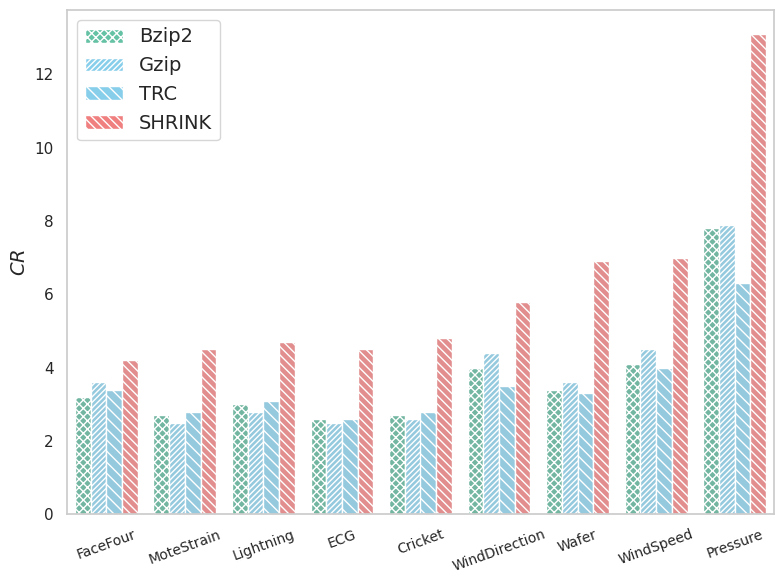

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.patches import Patch

# Data from the line plot
methods = ['Bzip2','Gzip','TRC','SHRINK']
# datasets =['Cricket', 'FaceFour', 'Lightning', 'MoteStrain', 'WindSpeed', 'WindDirection', 'Ecg', 'Wafer', 'Pressure']
# Bzip2 =   [2.7, 3.2, 3.0, 2.7, 4.1, 4.0, 2.6, 3.4, 7.8]
# Gzip =    [2.6, 3.6, 2.8, 2.5, 4.5, 4.4, 2.5, 3.6, 7.9]
# TRC =     [2.8, 3.4, 3.1, 2.8, 4.0, 3.5, 2.6, 3.3, 6.3]
# Shrink =  [ 4.8,        4.2,        4.7,        4.5,            7.0,        5.8,            4.5,   6.9,     13.1]
datasets =['FaceFour', 'MoteStrain', 'Lightning', 'ECG', 'Cricket', 'WindDirection', 'Wafer', 'WindSpeed', 'Pressure']
Bzip2 =   [3.2, 	    	2.7, 	  	3.0, 	    2.6,  	2.7, 	 	4.0, 		  3.4, 	   	4.1, 	     7.8	 ]
Gzip =    [3.6, 	    	2.5, 	  	2.8, 	    2.5,  	2.6, 	 	4.4, 		  3.6, 	   	4.5, 	     7.9	 ]
TRC =     [3.4, 	    	2.8, 	  	3.1, 	    2.6,  	2.8, 	 	3.5, 		  3.3, 	   	4.0, 	     6.3	 ]
SHRINK =  [4.2,            4.5,        4.7,        4.5,    4.8,        5.8,          6.9,      7.0,         13.1	 ]

# Constructing a DataFrame
df = pd.DataFrame({
    'Dataset': datasets,
    'Bzip2': Bzip2,
    'Gzip': Gzip,
    'TRC': TRC,
    'SHRINK': SHRINK
})

# Convert data to a long-form DataFrame
df_long = pd.melt(df, id_vars='Dataset', var_name='Method', value_name='Compression Ratio')

# Initialize the matplotlib figure
plt.figure(figsize=(8, 6))  # Remove subplots

# Set color palette and hatches
color_palette = sns.color_palette('tab10')
palette = ['lightgreen', 'pink', 'lightblue', color_palette[3]]
hatches = ['\\', '////', '//////', '']
# Define hatching patterns for each method
method_hatches = {
    'Bzip2': "XXXX",
    'Gzip': "//////",
    'TRC': "\\\\\\",
    'SHRINK': "\\\\\\\\"
}
color_palette = sns.color_palette('Set2')
method_colors = {'Bzip2':color_palette[0], 'Gzip': 'skyblue', 'TRC': 'skyblue', 'SHRINK': 'lightcoral'}


# Plot the bars using Seaborn's barplot
bar = sns.barplot(x="Dataset", y="Compression Ratio", hue="Method", data=df_long, palette=method_colors)

# Customizing the plot to replicate the style of the provided image
ax = plt.gca()
ax.set_ylabel(r'$CR$', fontsize=14)  # Set the name of the Y-axis
ax.set_xlabel('')  # Remove the x-axis title
legend = ax.legend(loc='upper left')  # Set the legend location

# Create custom legend with colors
legend_elements = [
    Patch(facecolor=method_colors[method], hatch=method_hatches[method], label=f'{method}')
    for method in methods
]

plt.legend(handles=legend_elements, loc='upper left', fontsize=14)

# Iterate over the methods and apply hatching patterns using the hue information
# for i, bar in enumerate(ax.patches):
#     # Calculate hatch based on number of methods
#     hatch = method_hatches[methods[i % len(methods)]]
#     bar.set_hatch(hatch)

hatches = iter([method_hatches[method] for method in methods if method in method_hatches])
for bars in bar.containers:
    hatch = next(hatches)
    for bar in bars:
        bar.set_hatch(hatch)

plt.grid(False)  # Turn off the grid for a cleaner look

# Save the plot as a PDF file
plt.xticks(rotation=20, fontsize=10)  # Rotate x-axis labels to avoid overlapping
plt.tight_layout()

pdf_filename = '/home/guoyou/ExtractSemantic/figure/crLossless.pdf'
plt.savefig(pdf_filename, format='pdf')

plt.show()


### 3、Average CR

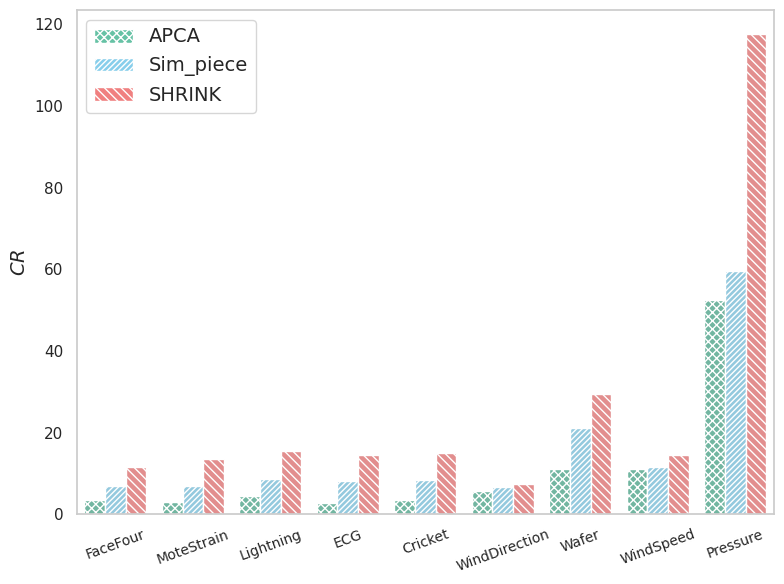

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.patches import Patch

Sim_piece_average = {
"FaceFour": 7.00
,"MoteStrain": 7.02
,"Lightning": 8.66
,"ECG": 8.14
,"Cricket": 8.33
,"WindDirection": 6.75
,"Wafer": 21.01
,"WindSpeed": 11.67
,"Pressure": 59.60
}

SHRINK_values_average = {
"FaceFour": 11.61
,"MoteStrain": 13.42
,"Lightning": 15.40
,"ECG": 14.47
,"Cricket": 14.87
,"WindDirection": 7.51
,"Wafer": 29.43
,"WindSpeed": 14.57
,"Pressure": 117.64
}
apca_values_average = {
"FaceFour": 3.48
,"MoteStrain": 3.07
,"Lightning": 4.47
,"ECG": 2.65
,"Cricket": 3.44
,"WindDirection": 5.68
,"Wafer": 11.02
,"WindSpeed": 10.95
,"Pressure": 52.40
}

# Data from the line plot
methods = ['APCA', 'Sim_piece', 'SHRINK']
datasets =['FaceFour', 'MoteStrain', 'Lightning', 'ECG', 'Cricket', 'WindDirection', 'Wafer', 'WindSpeed', 'Pressure']
APCA =   list(apca_values_average.values())
Sim_piece = list(Sim_piece_average.values())
SHRINK =  list(SHRINK_values_average.values())

# Constructing a DataFrame
df = pd.DataFrame({
    'Dataset': datasets,
    'APCA': APCA ,
    'Sim_piece': Sim_piece,
    'SHRINK': SHRINK
})

# Convert data to a long-form DataFrame
df_long = pd.melt(df, id_vars='Dataset', var_name='Method', value_name='Compression Ratio')

# Initialize the matplotlib figure
plt.figure(figsize=(8, 6))  # Remove subplots

# Set color palette and hatches
# color_palette = sns.color_palette('tab10')
# palette = ['lightgreen', 'pink', 'lightblue', color_palette[3]]
hatches = ["XX", "//", "\\\\\\\\"]
# Define hatching patterns for each method
method_hatches = {
    'APCA': "XXXX",
    'Sim_piece': "//////",
    'SHRINK': "\\\\\\\\"
}
color_palette = sns.color_palette('Set2')
method_colors = {'APCA':color_palette[0], 'Sim_piece': 'skyblue', 'SHRINK': 'lightcoral'}


# Plot the bars using Seaborn's barplot
bar = sns.barplot(x="Dataset", y="Compression Ratio", hue="Method", data=df_long, palette=method_colors)

# Customizing the plot to replicate the style of the provided image
ax = plt.gca()
ax.set_ylabel(r'$CR$', fontsize=14)  # Set the name of the Y-axis
ax.set_xlabel('')  # Remove the x-axis title
legend = ax.legend(loc='upper left')  # Set the legend location

# Create custom legend with colors
legend_elements = [
    Patch(facecolor=method_colors[method], hatch=method_hatches[method], label=f'{method}')
    for method in methods
]

plt.legend(handles=legend_elements, loc='upper left', fontsize=14)

# Iterate over the methods and apply hatching patterns using the hue information
# for i, bar in enumerate(ax.patches):
#     # Calculate hatch based on number of methods
#     hatch = method_hatches[methods[i % len(methods)]]
#     bar.set_hatch(hatch)
# Iterate over the methods and apply hatching patterns using the hue information
hatches = iter([method_hatches[method] for method in methods if method in method_hatches])
for bars in bar.containers:
    hatch = next(hatches)
    for bar in bars:
        bar.set_hatch(hatch)


plt.grid(False)  # Turn off the grid for a cleaner look

# Save the plot as a PDF file
plt.xticks(rotation=20, fontsize=10)  # Rotate x-axis labels to avoid overlapping
plt.tight_layout()

pdf_filename = '/home/guoyou/ExtractSemantic/figure/CRLossyaverage.pdf'
plt.savefig(pdf_filename, format='pdf')

plt.show()


### 4、BaseError

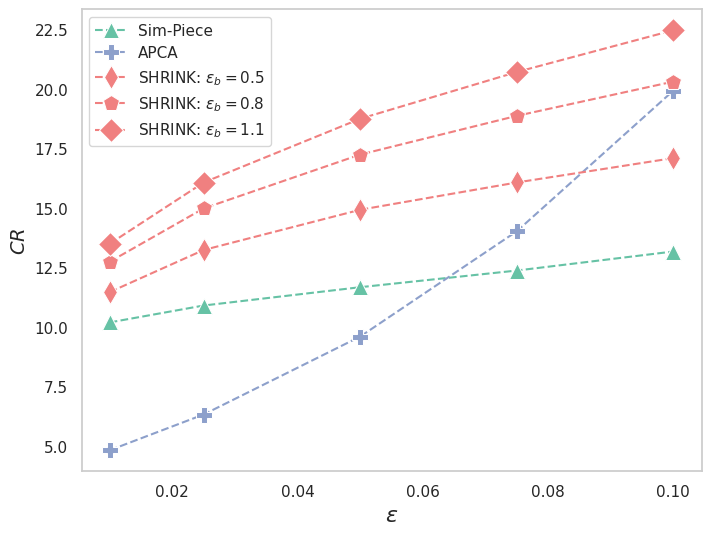

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Epsilon values and datasets
epsilon_values = [0.1, 0.075, 0.05, 0.025, 0.01] 
datasets = ['WindSpeed']

# Compression ratio values for 'Sim-Piece' for each dataset
Sim_piece_values = {
    'WindSpeed': [13.18,     12.38,  11.68,  10.91,  10.20],
}

APCA_values = {
    'WindSpeed':[19.939264, 14.029743,      9.605951,   6.330471,   4.828387],
}

SHRINK_values_5 = {
    'WindSpeed':[17.10552,16.08014,14.93426,13.24326,11.47445],
}

SHRINK_values_8 = {
    'WindSpeed':[20.31981,18.87981,17.25332,14.99001,12.74993],
}

SHRINK_values_11 = {
    'WindSpeed':[22.47746,20.72232,18.75791,16.07949,13.50467],
}

# Construct the DataFrame
rows = []
for dataset in datasets:
    for epsilon in epsilon_values:
        # Append 'Sim-Piece' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'Sim-Piece',
            'Epsilon': epsilon,
            'Compression Ratio': Sim_piece_values[dataset][epsilon_values.index(epsilon)]
        })
        # Append 'LFZip' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'APCA',
            'Epsilon': epsilon,
            'Compression Ratio': APCA_values[dataset][epsilon_values.index(epsilon)]
        })
        # Append 'Our' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'SHRINK: '+'$\epsilon_b=0.5$' ,
            'Epsilon': epsilon,
            'Compression Ratio': SHRINK_values_5[dataset][epsilon_values.index(epsilon)]
        })

        rows.append({
            'Dataset': dataset,
            'Method': 'SHRINK: '+'$\epsilon_b=0.8$',
            'Epsilon': epsilon,
            'Compression Ratio': SHRINK_values_8[dataset][epsilon_values.index(epsilon)]
        })
        # rows.append({
        #     'Dataset': dataset,
        #     'Method': 'Our: '+'$\epsilon_B=0.8$',
        #     'Epsilon': epsilon,
        #     'Compression Ratio': our_values_8[dataset][epsilon_values.index(epsilon)]
        # })
        rows.append({
            'Dataset': dataset,
            'Method': 'SHRINK: '+'$\epsilon_b=1.1$',
            'Epsilon': epsilon,
            'Compression Ratio': SHRINK_values_11[dataset][epsilon_values.index(epsilon)]
        })


df = pd.DataFrame(rows)

sns.set(style="whitegrid")
markers = {'Sim-Piece': '^',  'APCA': 'P', 'SHRINK: '+'$\epsilon_b=0.5$' : 'd',
            'SHRINK: '+'$\epsilon_b=0.8$': 'p','SHRINK: '+'$\epsilon_b=1.1$': 'D'}


color_palette = sns.color_palette("Set3")
palette = [color_palette[4], color_palette[9], color_palette[3],
                        color_palette[3], color_palette[3], color_palette[3], color_palette[3]]
color_palette = sns.color_palette('Set2')
palette = [color_palette[0], color_palette[2], 'lightcoral','lightcoral', 'lightcoral']

#palette = [color_palette[0], color_palette[4], color_palette[3], 
            #color_palette[3], color_palette[3], color_palette[3], color_palette[3], color_palette[3]]

# Plot 'WindSpeed' dataset
dataset = 'WindSpeed'
plt.figure(figsize=(8, 6))
sns.lineplot(data=df[df['Dataset'] == dataset], x='Epsilon', y='Compression Ratio',
             hue='Method',style='Method', dashes=False, linestyle='--', markers=markers, markersize=12, palette=palette) 
#plt.title(dataset)
plt.xlabel(r'$\epsilon$', fontsize=16)
plt.ylabel(r'$CR$', fontsize=14)
plt.grid(False)

# Remove the legend title
plt.legend(title=None)

# plt.tight_layout()

# Save the plot as a PDF file
pdf_filename = '/home/guoyou/ExtractSemantic/figure/varerror.pdf'
plt.savefig(pdf_filename, format='pdf')

plt.show()


### Multiresolution Comparsion

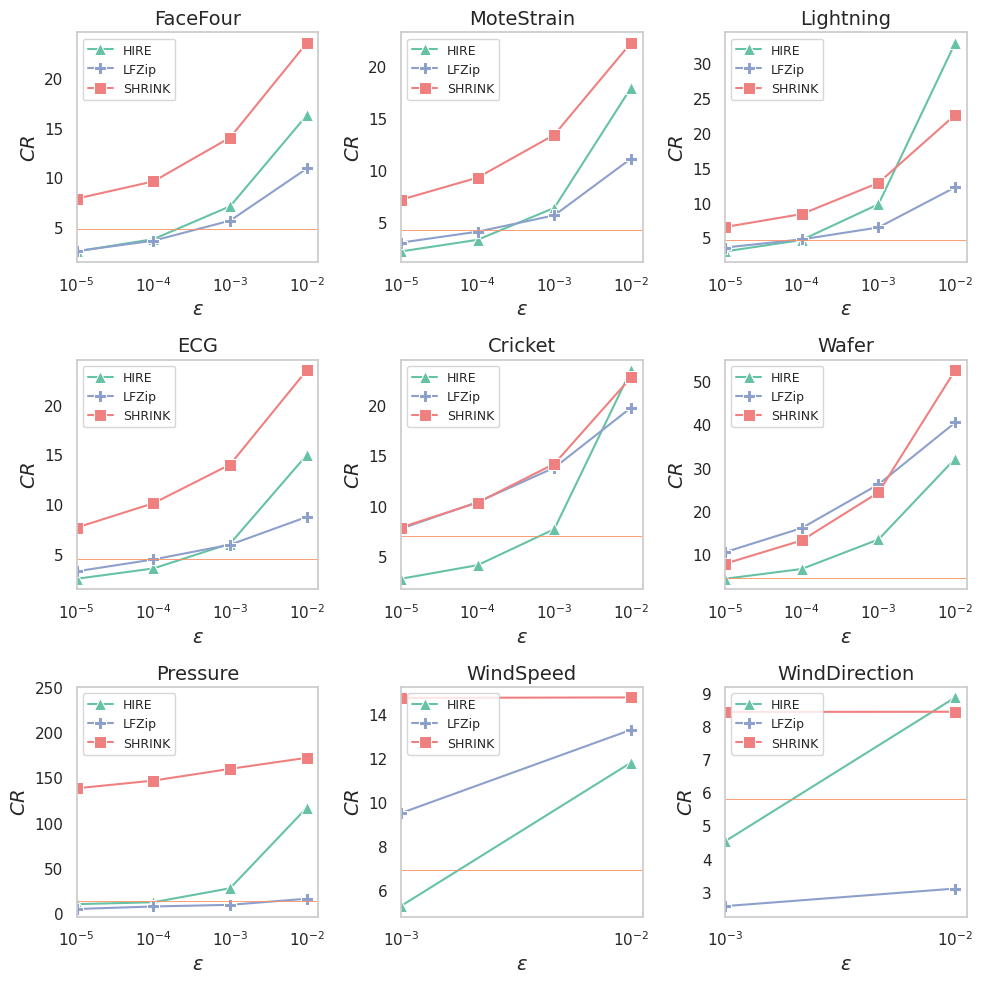

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import LogLocator


# Epsilon values and datasets
epsilon_values_default = [0.01  ,0.001 ,0.0001, 0.00001]  # 默认Epsilon值
epsilon_values_special = [ 0.01  ,0.001 ] 

losslesscr = [ 4.8,        4.2,        4.7,        4.5,            7.0,      4.5,     13.1,   6.9,        5.8]

# datasets = ["FaceFour", "MoteStrain", "Lightning", "ECG", "Cricket",  
#            "WindDirection", "Wafer", "WindSpeed",  "Pressure"]

datasets = ["FaceFour", "MoteStrain", "Lightning", "ECG", "Cricket", 
            "Wafer",    "Pressure",   "WindSpeed",  "WindDirection"]

# Update epsilon_values for "WindDirection" and "WindSpeed"
if "WindDirection" in datasets and "WindSpeed" in datasets:
    epsilon_values = [0.1, 0.075, 0.05, 0.025, 0.01]

SHRINK_values = {
'FaceFour':     [23.50418,13.99543,9.59475, 7.86782 ],
'MoteStrain':   [22.22237,13.38718,9.26864,  7.14202 ],
'Lightning':    [22.61970,12.83963,8.36240,  6.49525  ],
'ECG':          [23.45443,13.97348,10.08484,  7.63821],
'Cricket':      [22.73392,14.16069,10.31832, 7.84958  ],
'WindDirection':[8.43326 ,8.42967 ],
'Wafer':        [52.49376 ,24.24671 ,13.15999, 7.78700    ],
'WindSpeed':    [14.76770,14.74653],
'Pressure':     [171.69780,159.45269,146.43986, 137.93325]
}

HIRE_values = {
'FaceFour':     [16.248705,7.100163	,3.800844, 2.568134	],
'MoteStrain':   [17.910905, 6.370450, 3.298820, 2.180753],
'Lightning':    [32.968964,9.774857	, 4.637049, 2.990604],
'ECG':          [14.952742,6.032817	,3.537897, 2.500658],
'Cricket':      [23.452829	, 7.687507	, 4.116971, 2.766618],
'WindDirection':[ 8.865951, 4.518789],
'Wafer':        [32.072429	, 13.390407, 6.570025, 4.308673	],
'WindSpeed':    [11.807756	,5.280052	],
'Pressure':     [116.586169,27.357963, 11.850995, 9.744768]
}

LFZip_values = {
'FaceFour':     [10.8948,5.6607	, 3.6454, 2.6057],
'MoteStrain':   [11.103, 5.6485, 4.0767, 3.0275],
'Lightning':    [12.2185,6.4394	, 4.7252, 3.5494],
'ECG':          [8.7167	,5.9249	, 4.4394, 3.2484],
'Cricket':      [19.7334	,13.7776	, 10.3643, 7.7235],
'WindDirection':[3.0933, 2.5632],
'Wafer':        [40.4023	,26.106	, 16.0126, 10.4513],
'WindSpeed':    [13.2964, 9.5071],
'Pressure':     [15.751	,8.9786	, 7.1676, 4.3805]
}


# Construct the DataFrame
rows = []
for dataset in datasets:
        # 选择正确的Epsilon值序列
    if dataset in ["WindDirection", "WindSpeed"]:
        epsilon_values = epsilon_values_special
    else:
        epsilon_values = epsilon_values_default
        
    for epsilon in epsilon_values:
        # Append 'Sim-Piece' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'HIRE',
            'Epsilon': epsilon,
            'Compression Ratio': HIRE_values[dataset][epsilon_values.index(epsilon)]
        })

        # Append 'APCA' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'LFZip',
            'Epsilon': epsilon,
            'Compression Ratio': LFZip_values[dataset][epsilon_values.index(epsilon)]
        })

        # Append 'Our' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'SHRINK',
            'Epsilon': epsilon,
            'Compression Ratio': SHRINK_values[dataset][epsilon_values.index(epsilon)]
        })

df = pd.DataFrame(rows)

# Define the plotting style
sns.set(style="whitegrid")
markers = {'HIRE': '^',  'SHRINK': 's',  'LFZip':'P'}

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(10, 10), sharex=False, sharey=False)
axes = axes.flatten()

color_palette = sns.color_palette('tab10')
color_palette = sns.color_palette('Set2')
palette = [color_palette[0], color_palette[4], color_palette[3], color_palette[5]]
palette = [color_palette[0], 'skyblue', 'lightcoral']
palette = [color_palette[0], color_palette[2], 'lightcoral']


# 在绘制之前确定x轴的范围
min_epsilon_default = min(epsilon_values_default)
min_epsilon_special = min(epsilon_values_special)

# Plot each dataset
for i, dataset in enumerate(datasets):
    ax = axes[i]
    sns.lineplot(data=df[df['Dataset'] == dataset], x='Epsilon', y='Compression Ratio',
                 hue='Method',style='Method',   dashes=False, markers=markers, markersize=8, ax=ax, palette=palette) 
    ax.set_title(dataset, fontsize=14)
    ax.set_xlabel(r'$\epsilon$', fontsize=14)  # Set the name of the X-axis here
    ax.set_ylabel(r'$CR$', fontsize=14)  # Set the name of the X-axis here
    ax.set_xscale('log')
    ax.xaxis.set_major_locator(LogLocator(base=10, numticks=5))

 # Update epsilon_values for "WindDirection" and "WindSpeed"
    if "WindDirection" in dataset or "WindSpeed" in dataset:
        ax.set_xlim(left=min_epsilon_special)
        # if "WindDirection" in dataset:
        #             # 设置 y 轴刻度放大，最大值设置为 20
        #     ax.set_ylim(top=12)
        #     ax.yaxis.set_major_locator(MultipleLocator(2))  # 设置主刻度线
        # else:
        #     # 设置 y 轴刻度放大，最大值设置为 20
        #     ax.set_ylim(top=20)
        #     ax.yaxis.set_major_locator(MultipleLocator(2))  # 设置主刻度线
    elif 'Pressure' in dataset:
        ax.set_ylim(top=250)
        ax.set_xlim(left=min_epsilon_default)
        # ax.yaxis.set_major_locator(MultipleLocator(2))  # 设置主刻度线
    else:
        ax.set_xlim(left=min_epsilon_default)

    # 绘制CR=5的横虚线
    ax.axhline(y=losslesscr[i], color=color_palette[1], linewidth=1*0.6)
    # 添加"Lossless"注释
    # ax.text(ax.get_xlim()[1]*0.1, 5.1, 'Lossless', fontsize=8, va='bottom', ha='right', color='gray')
    # ax.text(ax.get_xlim()[1]*0.1, 5.1, 'Lossless', fontsize=8, va='bottom', ha='right', color='gray')


    axes[i].grid(False)  # Turn off the grid
    

# Remove extra subplots if datasets are less than 9
for j in range(i + 1, 9):
    fig.delaxes(axes[j])

# Iterate through the axes to remove the legend title
for ax in fig.axes:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=labels, fontsize=9, loc="upper left")

plt.tight_layout()

# # Save the plot as a PDF file
pdf_filename = '/home/guoyou/ExtractSemantic/figure/multiresolution.pdf'
plt.savefig(pdf_filename, format='pdf')


plt.show()

### BaseSize

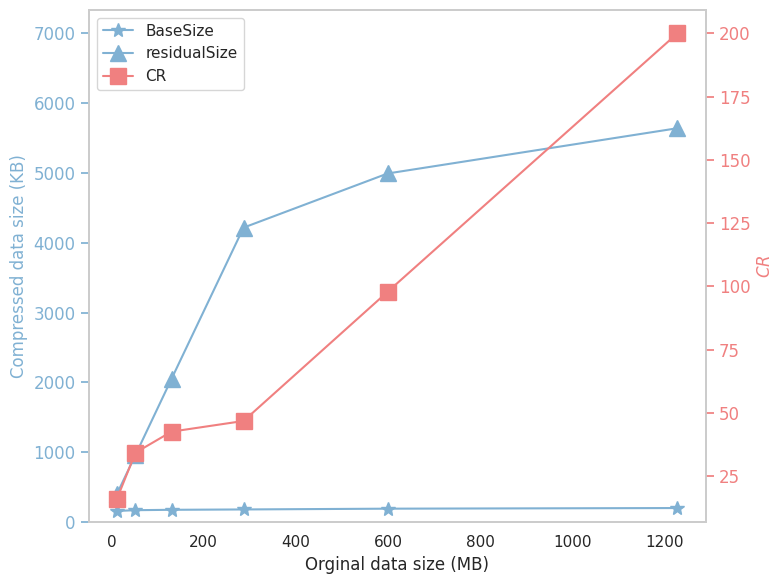

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Reusing the provided data
time_hours = np.array([11.30, 51.64, 129.88, 286.37, 599.33, 1.20*1024])
BaseSize = np.array([161.618,  172.632, 178.101,  183.121,   194.211, 203.306])
residualSize = np.array([403.707,  963.297,  2050.910, 4216.141, 4990.914, 5638.724])

# Let's assume the original size is a linear increment from 1000 MB to 6000 MB
originalSize_MB = np.linspace(1000, 6000, num=len(time_hours))

# Compression Ratio for residualSize
CR = [0.06271, 0.02920, 0.02350, 0.02138, 0.01022, 0.00500  ]# Convert MB to KB for CR calculation
CR_residualSize = [1/c for c in CR]
color_palette = sns.color_palette("Set3")
sns.set(style="whitegrid")


# Now, we add the second y-axis to the existing plot
fig, ax1 = plt.subplots(figsize=(8,6))

# Plotting the original data on the first y-axis
ax1.set_xlabel('Orginal data size (MB)', fontsize=12)
ax1.set_ylabel('Compressed data size (KB)', fontsize=12, color=color_palette[4])
ln1 = ax1.plot(time_hours, BaseSize, '*-', color=color_palette[4], markersize=10, label='BaseSize')
ln2 = ax1.plot(time_hours, residualSize, '^-', color=color_palette[4], markersize=12, label='residualSize')
ax1.tick_params(axis='y', colors=color_palette[4], labelsize=12, labelcolor=color_palette[4])


# Increasing y-axis limit
ax1.set_ylim(0, max(residualSize) * 1.3)

color_palette = sns.color_palette("hls", 8)
# Adding the second y-axis for the Compression Ratio
ax2 = ax1.twinx()  
ax2.set_ylabel(r'$CR$', fontsize=12, color='lightcoral') 
ln3 = ax2.plot(time_hours, CR_residualSize, 's-', color='lightcoral', markersize=12, label='CR')
# ax2.tick_params(axis='y', colors='lightcoral', labelsize=12, labelcolor='lightcoral')
ax2.tick_params(axis='y', colors='lightcoral', labelsize=12, labelcolor='lightcoral')



# Combining the legends from both axes
lns = ln1+ln2+ln3
labs = [l.get_label() for l in lns]
leg = ax1.legend(lns, labs, loc='upper left')
# Displaying the plot
# Remove the grid
ax1.grid(False)
ax2.grid(False)
plt.tight_layout()


# Save the plot as a PDF file
pdf_filename = '/home/guoyou/ExtractSemantic/figure/BaseChange.pdf'
plt.savefig(pdf_filename, format='pdf')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Reusing the provided data
time_hours = np.array([11.30, 51.64, 129.88, 286.37, 599.33, 1.20*1024])
BaseSize = np.array([161.618,  172.632, 178.101,  183.121,   194.211, 203.306])
residualSize = np.array([403.707,  963.297,  2050.910, 4216.141, 4990.914, 5638.724])

# Let's assume the original size is a linear increment from 1000 MB to 6000 MB
originalSize_MB = np.linspace(1000, 6000, num=len(time_hours))

# Compression Ratio for residualSize
CR = [0.06271, 0.02920, 0.02350, 0.02138, 0.01022, 0.00500  ]# Convert MB to KB for CR calculation
CR_residualSize = [1/c for c in CR]
color_palette = sns.color_palette("Set3")
sns.set(style="whitegrid")


# Now, we add the second y-axis to the existing plot
fig, ax1 = plt.subplots(figsize=(8,6))

# Plotting the original data on the first y-axis
ax1.set_xlabel('Orginal data size (MB)', fontsize=12)
ax1.set_ylabel('Compressed data size (KB)', fontsize=12, color=color_palette[4])
ln1 = ax1.plot(time_hours, BaseSize, '^-', color=color_palette[4], markersize=12, label='BaseSize')
ln2 = ax1.plot(time_hours, residualSize, 'o-', color=color_palette[4], markersize=12, label='residualSize')
ax1.tick_params(axis='y', colors=color_palette[4], labelsize=12, labelcolor=color_palette[4])


# Increasing y-axis limit
ax1.set_ylim(0, max(residualSize) * 1.3)

color_palette = sns.color_palette("hls", 8)
# Adding the second y-axis for the Compression Ratio
ax2 = ax1.twinx()  
ax2.set_ylabel(r'$CR$', fontsize=12, color='lightcoral') 
ln3 = ax2.plot(time_hours, CR_residualSize, 's-', color='lightcoral', markersize=12, label='CR')
ax2.tick_params(axis='y', colors='lightcoral', labelsize=12, labelcolor='lightcoral')

# Changing y-axis line color for the second y-axis
ax2.spines['left'].set_color(color_palette[4])
ax2.spines['right'].set_color('lightcoral')

# Changing the top spine color to match the x-axis
ax1.spines['top'].set_color('skyblue')

# Combining the legends from both axes
lns = ln1+ln2+ln3
labs = [l.get_label() for l in lns]
leg = ax1.legend(lns, labs, loc='upper left')
# Displaying the plot
# Remove the grid
ax1.grid(False)
ax2.grid(False)

# Save the plot as a PDF file
# pdf_filename = '/home/guoyou/ExtractSemantic/figure/BaseChange.pdf'
# plt.savefig(pdf_filename, format='pdf')
plt.show()


### Speed

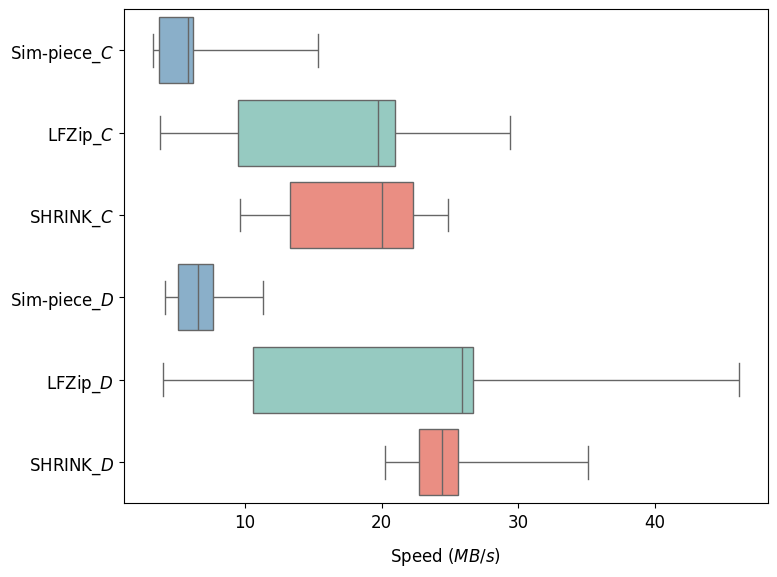

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl

# 设置全局字体大小
mpl.rcParams['font.size'] = 14

# 创建一个假设的数据集，每个压缩器有一定数量的压缩比值
compressors = ['SC','OC', 'LC', 'SD','LD', 'OD']
data = pd.DataFrame({
    'Sim-piece_'+r'$C$': [5.85, 4.88, 6.21, 5.84, 3.27, 3.29, 3.73, 6.83, 15.34],
    'LFZip_'+r'$C$': [20.999, 3.745, 9.513, 8.561, 19.787, 16.896, 19.728, 25.989, 29.42],
    'SHRINK_'+r'$C$':   [22.68,  13.29, 20.03, 17.52, 12.93,  9.64,   21.18,    22.30,  24.86],
    'Sim-piece_'+r'$D$': [7.62, 7.81, 7.57,  6.53,  5.10, 4.15, 4.48,  6.57, 11.27],
    'LFZip_'+r'$D$':  [26.686, 3.976, 10.585, 8.95, 25.903, 20.699, 26.04, 33.294, 46.123],
    'SHRINK_'+r'$D$': [ 33.47, 20.71, 24.41, 25.21, 22.69, 20.21, 23.57, 25.60, 35.06],
})
color_palette = sns.color_palette("Set3")
#palette = [color_palette[6], color_palette[4], color_palette[3],color_palette[0], color_palette[2], color_palette[7]]
palette = [color_palette[4], color_palette[0], color_palette[3],color_palette[4], color_palette[0], color_palette[3]]

# 使用 seaborn 的 color_palette 函数来为箱线图设置颜色
#palette = sns.color_palette("colorblind")  # colorblind 是 seaborn 提供的一个颜色盲友好的调色板

# 创建一个字典，将相似的压缩器映射到相似的颜色


# 使用这个调色板来创建箱线图
plt.figure(figsize=(8, 6))  # 调整图表大小
plt.grid(False)
# boxplot = sns.boxplot(x='Speed', y='Compressor', data=data, palette=palette, fliersize=0, orient='h', hue='Compressor', legend=False)
boxplot = sns.boxplot(data=data,  palette=palette, fliersize=2, orient='h', legend=False, whis=10)


# 设置标题和坐标轴标签
#boxplot.set_title('Average Compress/Decompress Speed', fontsize=16, pad=12)
#boxplot.set_ylabel('Method', fontsize=12)
boxplot.set_xlabel('Speed '+ r'$(MB/s)$', fontsize=12)

# 调整x轴和y轴上的字体大小
plt.tick_params(axis='x', labelsize=12)  # x轴标签字体大小
plt.tick_params(axis='y', labelsize=12)  # y轴标签字体大小

# 调整x轴标题与x轴的距离
boxplot.xaxis.labelpad = 10  # 调整距离，可以根据需要进行调整
boxplot.yaxis.labelpad = 10  # 调整距离，可以根据需要进行调整


plt.tight_layout()
# Save the plot as a PDF file
pdf_filename = '/home/guoyou/ExtractSemantic/figure/speed.pdf'
plt.savefig(pdf_filename, format='pdf')

# 显示图表
plt.show()




### Buffer size

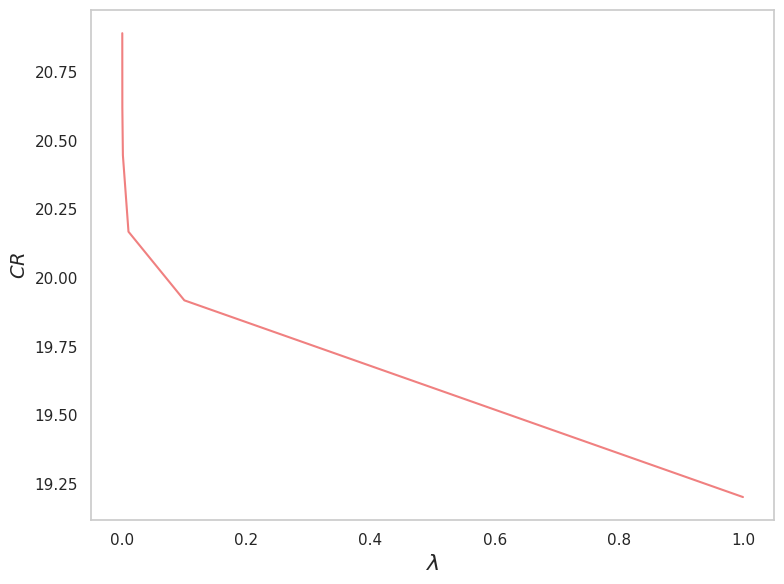

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Epsilon values and datasets
# epsilon_values = [2, 1, 0.1, 0.01, 0.001, 0.0001] 
# CR_values = [20.17704,  19.20247,  19.91861, 20.16854, 20.44662, 20.62010]

epsilon_values = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001] 
CR_values = [ 19.20247,  19.91861, 20.16854, 20.44662, 20.62010,  20.89118]




sns.set(style="whitegrid")

color_palette = sns.color_palette('Set2')
palette = [color_palette[0], color_palette[2], 'lightcoral','lightcoral', 'lightcoral']
palette = ['lightcoral']



# Plot 'WindSpeed' dataset
plt.figure(figsize=(8, 6))
sns.lineplot(x=epsilon_values, y=CR_values, dashes=False, color='lightcoral') 
#plt.title(dataset)
plt.xlabel(r'$\lambda$', fontsize=16)
plt.ylabel(r'$CR$', fontsize=14)
plt.grid(False)

# # Remove the legend title
# plt.legend(title=None)

plt.tight_layout()

# Save the plot as a PDF file
pdf_filename = '/home/guoyou/ExtractSemantic/figure/intervalsize.pdf'
plt.savefig(pdf_filename, format='pdf')

plt.show()


### Buffer size to time

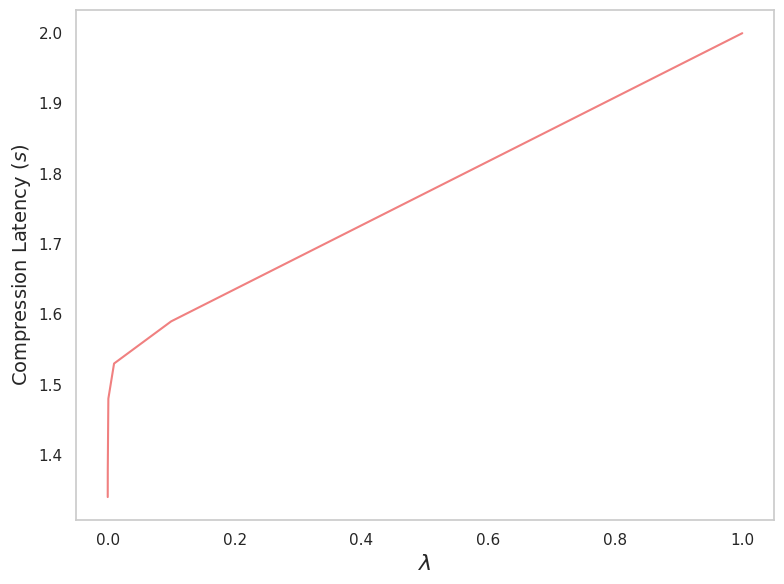

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Epsilon values and datasets
# epsilon_values = [2, 1, 0.1, 0.01, 0.001, 0.0001] 
# CR_values = [20.17704,  19.20247,  19.91861, 20.16854, 20.44662, 20.62010]

epsilon_values = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001] 
CR_values = [ 19.20247,  19.91861, 20.16854, 20.44662, 20.62010,  20.89118]
Time = [ 2.0,  1.59, 1.53, 1.48, 1.38,  1.34]




sns.set(style="whitegrid")

color_palette = sns.color_palette('Set2')
palette = [color_palette[0], color_palette[2], 'lightcoral','lightcoral', 'lightcoral']
palette = ['lightcoral']



# Plot 'WindSpeed' dataset
plt.figure(figsize=(8, 6))
sns.lineplot(x=epsilon_values, y=Time , dashes=False, color='lightcoral') 
#plt.title(dataset)
plt.xlabel(r'$\lambda$', fontsize=16)
plt.ylabel(r'Compression Latency $ (s)$', fontsize=14)
plt.grid(False)

# # Remove the legend title
# plt.legend(title=None)

plt.tight_layout()

# Save the plot as a PDF file
pdf_filename = '/home/guoyou/ExtractSemantic/figure/intervaltime.pdf'
plt.savefig(pdf_filename, format='pdf')

plt.show()


### Additional batch

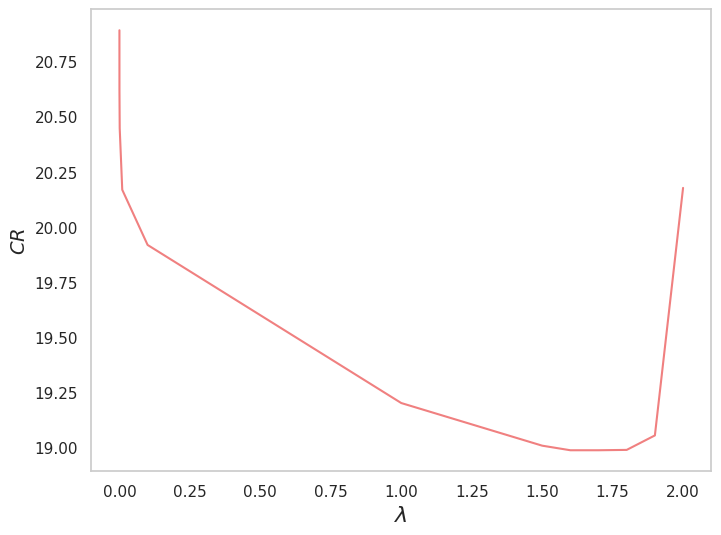

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Epsilon values and datasets
# epsilon_values = [2, 1, 0.1, 0.01, 0.001, 0.0001] 
# CR_values = [20.17704,  19.20247,  19.91861, 20.16854, 20.44662, 20.62010]

epsilon_values = [2.0, 1.9, 1.8, 1.7, 1.6, 1.5, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001] 
CR_values = [ 20.17704, 19.05573, 18.99019,18.98858, 18.98858,19.00936, 19.20247,  19.91861, 20.16854, 20.44662, 20.62010,  20.89118]




sns.set(style="whitegrid")

color_palette = sns.color_palette('Set2')
palette = [color_palette[0], color_palette[2], 'lightcoral','lightcoral', 'lightcoral']
palette = ['lightcoral']



# Plot 'WindSpeed' dataset
plt.figure(figsize=(8, 6))
sns.lineplot(x=epsilon_values, y=CR_values, dashes=False, color='lightcoral') 
#plt.title(dataset)
plt.xlabel(r'$\lambda$', fontsize=16)
plt.ylabel(r'$CR$', fontsize=14)
plt.grid(False)

# # Remove the legend title
# plt.legend(title=None)

# plt.tight_layout()

# Save the plot as a PDF file
# pdf_filename = '/home/guoyou/ExtractSemantic/figure/intervalsize.pdf'
# plt.savefig(pdf_filename, format='pdf')

plt.show()


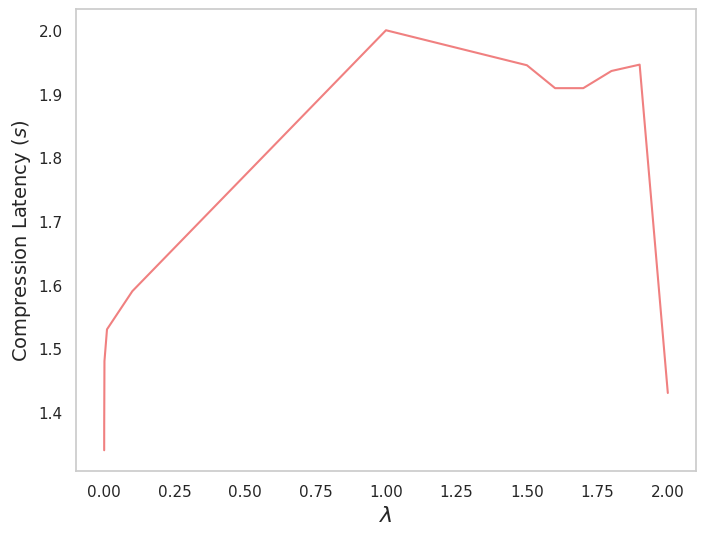

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Epsilon values and datasets
# epsilon_values = [2, 1, 0.1, 0.01, 0.001, 0.0001] 
# CR_values = [20.17704,  19.20247,  19.91861, 20.16854, 20.44662, 20.62010]

epsilon_values = [ 2, 1.9, 1.8, 1.7, 1.6, 1.5, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001] 
Time = [ 1.430, 1.946, 1.936, 1.909, 1.909, 1.945, 2.0,  1.59, 1.53, 1.48, 1.38,  1.34]




sns.set(style="whitegrid")

color_palette = sns.color_palette('Set2')
palette = [color_palette[0], color_palette[2], 'lightcoral','lightcoral', 'lightcoral']
palette = ['lightcoral']



# Plot 'WindSpeed' dataset
plt.figure(figsize=(8, 6))
sns.lineplot(x=epsilon_values, y=Time , dashes=False, color='lightcoral') 
#plt.title(dataset)
plt.xlabel(r'$\lambda$', fontsize=16)
plt.ylabel(r'Compression Latency $ (s)$', fontsize=14)
plt.grid(False)

# # Remove the legend title
# plt.legend(title=None)

# plt.tight_layout()

# Save the plot as a PDF file
# pdf_filename = '/home/guoyou/ExtractSemantic/figure/intervaltime.pdf'
# plt.savefig(pdf_filename, format='pdf')

plt.show()
